## 253 - Gridding Mesonet Data and Merging Dataframes in Pandas

[Youtube](https://www.youtube.com/watch?v=UUfIzMIKqDQ)

In [1]:
data_fname = 'https://www.mesonet.org/data/public/mesonet/mdf/2011/11/02/201111022025.mdf'
loc_fname = 'https://www.mesonet.org/index.php/api/siteinfo/from_all_active_with_geo_fields/format/csv'

In [2]:
import pandas as pd
import metpy.calc as mpcalc
import matplotlib.pyplot as plt
from metpy.units import units
from metpy.interpolate import interpolate_to_grid

In [3]:
df = pd.read_csv(data_fname, skiprows = 2, delim_whitespace = True)
df.head()

,STID,STNM,TIME,RELH,TAIR,WSPD,WVEC,WDIR,WDSD,WSSD,...,TA9M,WS2M,TS10,TB10,TS05,TB05,TS30,TR05,TR25,TR60
0,ADAX,1,1225,72,19.8,5.2,5.1,193,10.1,1.2,...,19.8,4.0,-995,-995,-995,-995,-995,-995,-995,-995
1,ALTU,2,1225,62,10.6,13.5,13.4,325,7.5,1.6,...,9.8,10.9,-995,-995,-995,-995,-995,-995,-995,-995
2,ARNE,6,1225,89,3.1,10.9,10.7,340,10.7,1.8,...,3.1,9.0,-995,-995,-995,-995,-995,-995,-995,-995
3,BEAV,8,1225,93,1.6,11.2,11.1,339,6.8,1.4,...,1.6,8.5,-995,-995,-995,-995,-995,-995,-995,-995
4,BESS,9,1225,72,7.5,12.6,12.5,322,7.1,1.9,...,7.2,10.4,-995,-995,-995,-995,-995,-995,-995,-995


In [4]:
df = df[['STID', 'TAIR', 'WSPD', 'WDIR', 'PRES']]
df.head()

,STID,TAIR,WSPD,WDIR,PRES
0,ADAX,19.8,5.2,193,977.97
1,ALTU,10.6,13.5,325,970.72
2,ARNE,3.1,10.9,340,938.03
3,BEAV,1.6,11.2,339,935.84
4,BESS,7.5,12.6,322,958.58


In [5]:
df_loc = pd.read_csv(loc_fname)
df_loc.head()

,stnm,stid,name,city,rang,cdir,cnty,nlat,elon,elev,...,A75,N75,BULK75,GRAV75,SAND75,SILT75,CLAY75,TEXT75,datc,datd
0,110,ACME,Acme,Rush Springs,4.0,WNW,Grady,34.80833,-98.02325,397,...,0.178,1.32,1.68,0.0,53.2,24.1,22.8,Sandy Clay Loam,19940101,20991231
1,1,ADAX,Ada,Ada,2.0,NNE,Pontotoc,34.79851,-96.66909,295,...,0.053,1.20,1.86,0.0,43.6,26.6,29.8,Clay Loam,19940101,20991231
2,2,ALTU,Altus,Altus,3.0,S,Jackson,34.58722,-99.33808,416,...,0.059,1.16,1.73,0.0,15.0,40.9,44.1,Silty Clay,19940101,20991231
3,116,ALV2,Alva,Alva,7.2,SSW,Woods,36.70823,-98.70974,439,...,-999.000,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999,19981217,20991231
4,3,ALVA,Alva,Alva,2.0,S,Woods,36.77970,-98.67170,450,...,-999.000,-999.00,-999.00,-999.0,-999.0,-999.0,-999.0,-999,19940101,19981216


In [6]:
df_loc = df_loc[['stid', 'nlat', 'elon']]
df_loc.head()

,stid,nlat,elon
0,ACME,34.80833,-98.02325
1,ADAX,34.79851,-96.66909
2,ALTU,34.58722,-99.33808
3,ALV2,36.70823,-98.70974
4,ALVA,36.77970,-98.67170


In [7]:
df_merged = pd.merge(df, df_loc, left_on = 'STID', right_on = 'stid')
df_merged.head()

,STID,TAIR,WSPD,WDIR,PRES,stid,nlat,elon
0,ADAX,19.8,5.2,193,977.97,ADAX,34.79851,-96.66909
1,ALTU,10.6,13.5,325,970.72,ALTU,34.58722,-99.33808
2,ARNE,3.1,10.9,340,938.03,ARNE,36.07204,-99.90308
3,BEAV,1.6,11.2,339,935.84,BEAV,36.80253,-100.53012
4,BESS,7.5,12.6,322,958.58,BESS,35.40185,-99.05847


In [8]:
df_merged.drop('stid', axis = 1, inplace = True)
df_merged.head()

,STID,TAIR,WSPD,WDIR,PRES,nlat,elon
0,ADAX,19.8,5.2,193,977.97,34.79851,-96.66909
1,ALTU,10.6,13.5,325,970.72,34.58722,-99.33808
2,ARNE,3.1,10.9,340,938.03,36.07204,-99.90308
3,BEAV,1.6,11.2,339,935.84,36.80253,-100.53012
4,BESS,7.5,12.6,322,958.58,35.40185,-99.05847


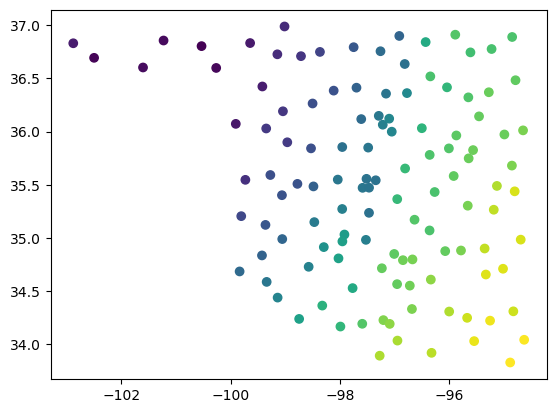

In [9]:
plt.scatter(df_merged['elon'], df_merged['nlat'], c = df_merged['TAIR'])

In [10]:
df_merged['U'], df_merged['V'] = mpcalc.wind_components(df_merged['WSPD'].values * units('m/s'), df_merged['WDIR'].values * units.degrees)
 
gridx, gridy, grid_temperature = interpolate_to_grid(df_merged['elon'].values, df_merged['nlat'].values, df_merged['TAIR'].values, interp_type = 'cressman', minimum_neighbors = 1, search_radius = 0.5, hres = 0.1)

gridx, gridy, grid_pressure = interpolate_to_grid(df_merged['elon'].values, df_merged['nlat'].values, df_merged['PRES'].values, interp_type = 'cressman', minimum_neighbors = 1, search_radius = 0.5, hres = 0.1)

gridx, gridy, grid_u = interpolate_to_grid(df_merged['elon'].values, df_merged['nlat'].values, df_merged['U'].values, interp_type = 'cressman', minimum_neighbors = 1, search_radius = 0.5, hres = 0.1)

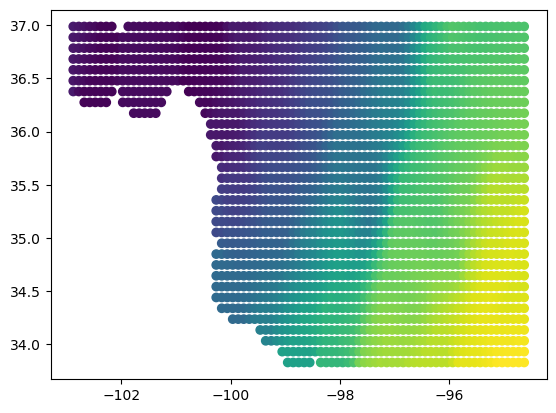

In [11]:
plt.scatter(gridx, gridy, c = grid_temperature)

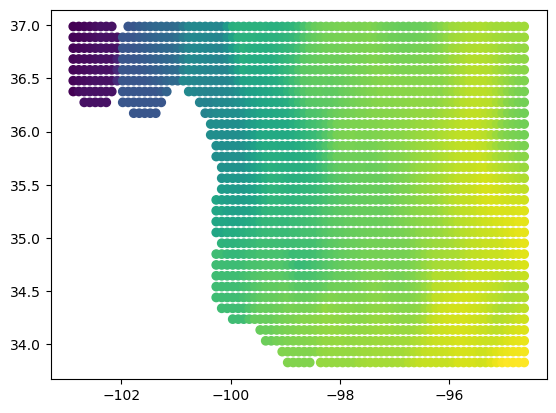

In [12]:
plt.scatter(gridx, gridy, c = grid_pressure)

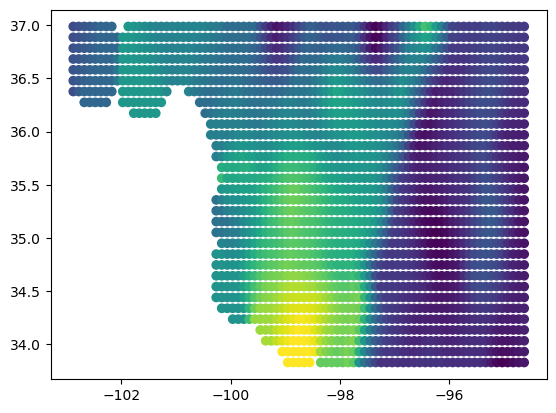

In [13]:
plt.scatter(gridx, gridy, c = grid_u)